- Maheshvaran S
- 205229119

## Lab7. Loan Approval Classification using SVM

#### Objectives 
In this lab, you will build a classification model to classify the loan applicants into eligible applicants or not 
eligible applicants using Support Vector Machine. 

#### Learning Outcomes 
After completing this lab, you will be able to 
- Apply data cleaning methods 
- Perform EDA and understand who got their loans approved 
- Do feature engineering with One Hot Encoding 
- Create LinearSVC model, train and predict on the data 
- Print accuracy, confusion matrix and classification report 
- Compare LinearSVC model with SVC and SGDClassifier models 

#### Business Use Case 
Heber Housing Finance deals in all home loans. They have presence across all urban, semi urban and rural 
areas. Customer first apply for home loan after that company validates the customer eligibility for loan. 
However doing this manually takes a lot of time. Hence, it wants you to automate the loan approval 
process (real time) based on customer information. So you should identify all features and build a model 
that enable the company to approve the load application or not. 

The dataset contains the details of 614 loan applicants, where each applicant is described with 12 
features. Loan_Status is the target feature (ie., dependent variable) and all others are independent 
variables.

#### Step1. [Understand Data]. Using Pandas, import “train_loan.csv” file and print properties such as head, shape, columns, dtype, info and value_counts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('train_loan.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train_data.shape

(614, 13)

In [3]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.value_counts

<bound method DataFrame.value_counts of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849  

#### Step2. [Data Cleaning] 
- Replace numbers as string by integer in “Dependents” column
- Fill missing data in categorical columns (Gender, Married, Dependents, Education, 
Self_Employed, Credit_History) by its mode value 
- Handle missing values in numberical columns 
- Drop Loan_ID column 

In [7]:
train_data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
#Replace numbers as string by integer in 'Dependents' column
def string(x):
    if x == '0':
        return 'bad'
    elif x == '1':
        return 'average'
    elif x == '2':
        return 'good'
    else:
        return 'excellent'

In [9]:
train_data['Dependents'] = train_data['Dependents'].apply(string)

In [10]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#categorical
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
#numerical
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)

In [12]:
train_data=train_data.drop(['Loan_ID'],axis=1)

#### Step3. [OPTIONAL: Exploratory Data Analysis - Who got their loan approved] 
Draw count plot for 
- Married? 
- Dependants? 
- Graduates? 
- Self-employed? 

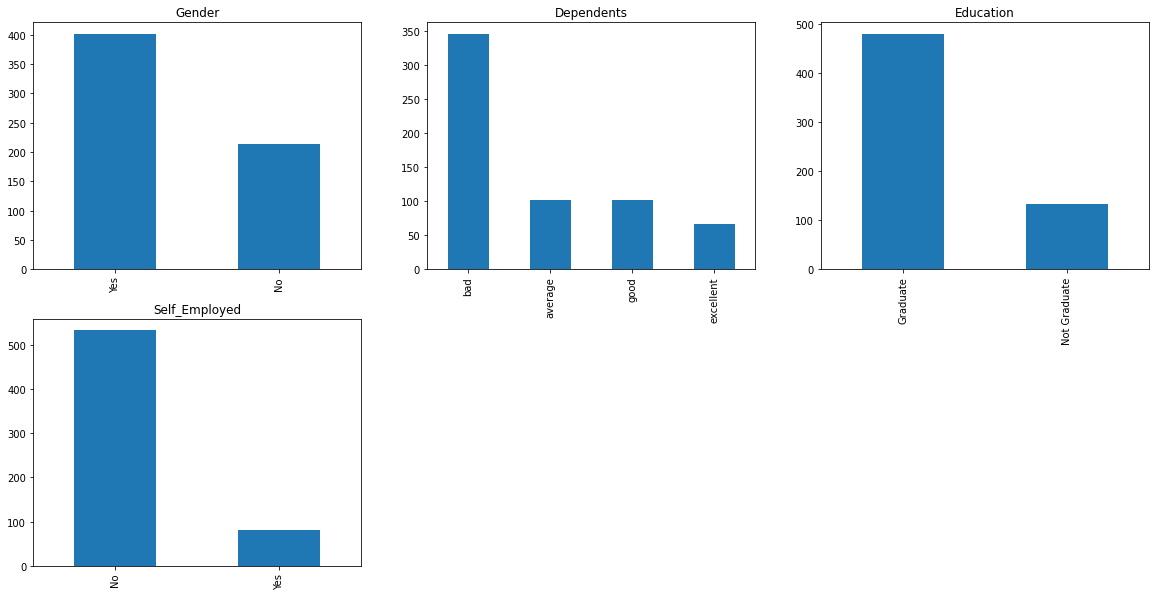

In [13]:
plt.subplot(231)
train_data['Married'].value_counts().plot(kind='bar',title='Gender',figsize = (20,10))

plt.subplot(232)
train_data['Dependents'].value_counts().plot(kind='bar',title='Dependents')

plt.subplot(233)
train_data['Education'].value_counts().plot(kind='bar',title='Education')

plt.subplot(234)
train_data['Self_Employed'].value_counts().plot(kind='bar',title='Self_Employed')

plt.show()

#### Step4. [Extract X and y] from the dataframe

In [14]:
X = train_data.drop(['Loan_Status'],axis=1)
y = train_data.Loan_Status

#### Step5. [One Hot Encoding] 
Perform OHE on categorical columns, use this method: X = pd.get_dummies(X) 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
X = pd.get_dummies(X)

#### Step6. [Model Building] 
- Split X and y for training and testing 
- Using StandardScaler, fit_transform on X_train and transform on X_test values 
- create LinearSVC model, train and test 
- print accuracy value 
- Print confusion matrix between y_test and y_pred 
- Print classification_report 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [19]:
ss = scale.fit_transform(X_train)
ss1 = scale.transform(X_test)

In [20]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(ss,y_train)

LinearSVC()

In [21]:
Lsvc_y_pred = model.predict(ss1)
Lsvc_y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test,Lsvc_y_pred)

0.8324324324324325

In [23]:
confusion_matrix(y_test,Lsvc_y_pred)


array([[ 22,  29],
       [  2, 132]], dtype=int64)

In [24]:
print(classification_report(y_test,Lsvc_y_pred))

              precision    recall  f1-score   support

           N       0.92      0.43      0.59        51
           Y       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



#### Step7. [Performance Comparisons] 

#### 1. Compare the performance of LinearSVC against LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression

lgr= LogisticRegression()
lgr.fit(ss,y_train)
lr_y_pred = lgr.predict(ss1) 

from sklearn.svm import LinearSVC

l_svc = LinearSVC()
l_svc.fit(ss,y_train)
lsvc_y_pred = l_svc.predict(ss1)

print("LogisticRegression:",accuracy_score(y_test,lr_y_pred))
print("LinearSVC         :",accuracy_score(y_test,lsvc_y_pred))

LogisticRegression: 0.8324324324324325
LinearSVC         : 0.8324324324324325


SVC: 0.564120 (0.138692)
LR: 0.797231 (0.070487)


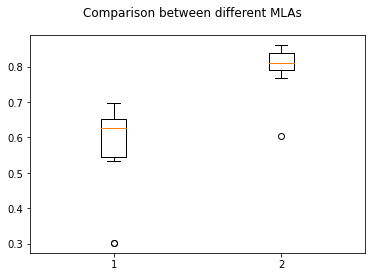

In [26]:
from sklearn import svm,model_selection
models = []
models.append(('SVC', LinearSVC()))
models.append(('LR', LogisticRegression()))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

#### 2. Compare the performance of LinearSVC against SGDClassifier

SVC: 0.577796 (0.156098)
SGD: 0.529236 (0.153889)


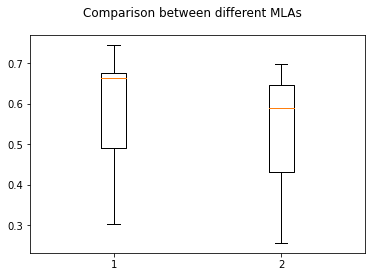

In [27]:
from sklearn.linear_model import SGDClassifier

modelss = []
modelss.append(('SVC', LinearSVC()))
modelss.append(('SGD', SGDClassifier()))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in modelss:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [28]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(ss,y_train)
sgdc_y_pred = sgd.predict(ss1)

from sklearn.svm import LinearSVC

l_svc = LinearSVC()
l_svc.fit(ss,y_train)
lsvc_y_pred = l_svc.predict(ss1)

print("SGDClassifier:", accuracy_score(y_test,sgdc_y_pred))
print("LinearSVC    :",accuracy_score(y_test,lsvc_y_pred))

SGDClassifier: 0.6324324324324324
LinearSVC    : 0.8324324324324325


#### 3. Compare LinearSVC against SVC with various kernels such as ‘linear’, ‘poly’, ‘rbf’ and ‘sigmoid’

In [29]:
from sklearn.svm import SVC

l_svc = LinearSVC()
l_svc.fit(ss,y_train)
lsvc_y_pred = l_svc.predict(ss1)


poly_svc = svm.SVC(kernel='poly', C = 1.0)
poly_svc.fit(ss,y_train)
psvc_y_pred=poly_svc.predict(ss1)


rbf_svc = svm.SVC(kernel='rbf', C = 1.0)
rbf_svc.fit(ss,y_train)
rbfsvc_y_pred=rbf_svc.predict(ss1)


sigmoid_svc = svm.SVC(kernel='sigmoid', C = 1.0)
sigmoid_svc.fit(ss,y_train)
sigsvc_y_pred=sigmoid_svc.predict(ss1)


print("LinearSVC   :",accuracy_score(y_test,lsvc_y_pred))
print("poly SVC    :",accuracy_score(y_test,psvc_y_pred))
print("rbf SVC     :",accuracy_score(y_test,rbfsvc_y_pred))
print("Sigmoid SVC :",accuracy_score(y_test,sigsvc_y_pred))

LinearSVC   : 0.8324324324324325
poly SVC    : 0.8162162162162162
rbf SVC     : 0.8324324324324325
Sigmoid SVC : 0.8054054054054054


SVC: 0.605980 (0.091265)
SVC POLY: 0.671096 (0.047891)
SVC rbf: 0.666445 (0.055735)
SVC POLY: 0.603710 (0.092483)


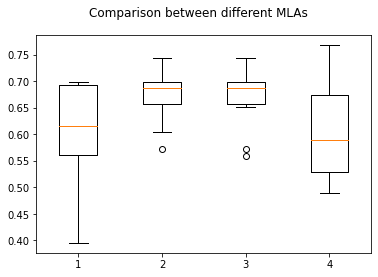

In [30]:
modelsss = []
modelsss.append(('SVC', LinearSVC()))
modelsss.append(('SVC POLY', svm.SVC(kernel='poly', C = 1.0)))
modelsss.append(('SVC rbf', svm.SVC(kernel='rbf', C = 1.0)))
modelsss.append(('SVC POLY', svm.SVC(kernel='sigmoid', C = 1.0)))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in modelsss:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

#### 4. Interpret the results

In [31]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

MLA  = [model,lgr,sgd,poly_svc,rbf_svc,sigmoid_svc]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(ss, y_train).predict(ss1)
    predicted=np.where(predicted=='Y',1,0)
    y_testb=np.where(y_test=='Y',1,0)
    fp, tp, th = roc_curve(y_testb, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(ss,y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(ss1,y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_testb, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_testb, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    row_index+=1
    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,SVC,0.7506,0.8054,0.810127,0.955224,0.683494
1,LogisticRegression,0.8042,0.8324,0.819876,0.985075,0.708224
2,SGDClassifier,0.7203,0.7514,0.818841,0.843284,0.676544
3,SVC,0.8368,0.8162,0.820513,0.955224,0.703102
4,SVC,0.8135,0.8324,0.819876,0.985075,0.708224
5,SVC,0.7506,0.8054,0.810127,0.955224,0.683494


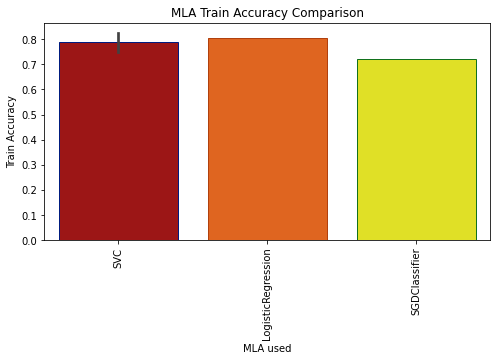

In [32]:
import seaborn as sns
# Creating plot to show the train accuracy
plt.subplots(figsize=(8,4))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()